C:\Users\Onthatile Lebogo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


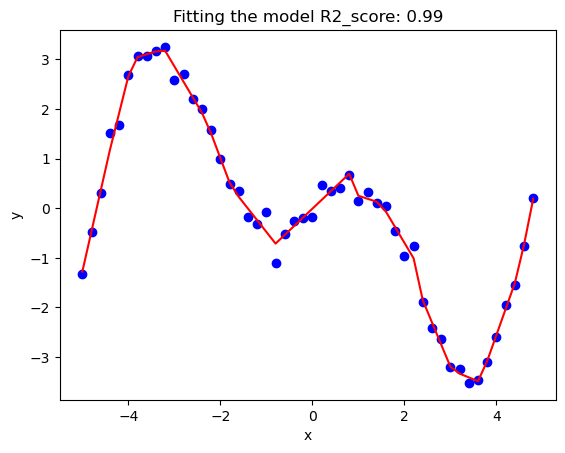

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("../datasets/1d_nonlinear_regression_data.csv")

x=df[['x']]
y=df[['y']]

scaler = StandardScaler()
scaler.fit(x)

clf = MLPRegressor(hidden_layer_sizes=(20), max_iter=1000,
                  early_stopping=False, activation='relu',solver='lbfgs')


xs = scaler.transform(x) #transform the data
clf.fit(xs,y)

y_pred =clf.predict(xs) #making the prediction

df2 =pd.DataFrame({'x' : x['x'].tolist(), 'y': y_pred.tolist()})
df2_sorted = df2.sort_values(by=['x'])


r2_ann = r2_score(y,y_pred)

plt.figure()
plt.scatter(x,y,color="blue")
plt.plot(df2_sorted['x'], df2_sorted['y'],color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting the model R2_score: %.2f'%(r2_ann))
plt.show()
